In [1]:
import pandas as pd
import os

companies = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/spark-fund-investment-analysis/companies.txt", sep="\t", encoding = "ISO-8859-1")
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies['permalink'] = companies['permalink'].str.upper() 
companies.head(2).append(companies.tail(2)) 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
66366,/ORGANIZATION/ASYS-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETL...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [2]:
rounds2 = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/spark-fund-investment-analysis/rounds2.csv", sep=",", encoding = "ISO-8859-1")
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper() # converting to upper case
print(rounds2.head(2).append(rounds2.tail(2))) # Sample 2 top and 2 bottom records

                                        company_permalink  \
0                                     /ORGANIZATION/-FAME   
1                                  /ORGANIZATION/-QOUNTER   
114947                               /ORGANIZATION/ASYS-2   
114948  /ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETL...   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1       /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
114947  /funding-round/35f09d0794651719b02bbfd859ba9ff5               seed   
114948  /funding-round/af942869878d2cd788ef5189b435ebc4              grant   

       funding_round_code   funded_at  raised_amount_usd  
0                       B  05-01-2015         10000000.0  
1                       A  14-10-2014                NaN  
114947                NaN  01-01-2015            18192.0  
114948                NaN  01-10-2013            14851.0  


In [5]:

print(len(rounds2['company_permalink'].unique()))
# We can see that unique entries = 66368

# Q2. How many unique companies are present in companies?
print(len(companies['permalink'].unique()))

66368
66368


In [6]:
temp1 = pd.DataFrame(companies.permalink.unique())
temp2 = pd.DataFrame(rounds2.company_permalink.unique())
print(type(temp1))          # Checking the data type
print(temp2.equals(temp1)) 

<class 'pandas.core.frame.DataFrame'>
True


In [8]:
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
print(master_frame.shape)  

(114949, 16)


In [9]:
print(master_frame.isnull().sum(axis=0))
print("Displaying the % missing values")
print(100*(master_frame.isnull().sum()/len(master_frame.index)))

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64
Displaying the % missing values
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code        

In [10]:
master_frame = master_frame.drop(['funding_round_code','homepage_url','state_code','region','city','founded_at'], axis =1)
print("Displaying the Updated % missing values")
print(100*(master_frame.isnull().sum()/len(master_frame.index)))

Displaying the Updated % missing values
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
dtype: float64


In [11]:
master_frame["raised_amount_usd"].describe().apply(lambda x : format(x, 'f'))

count          94959.000000
mean        10426869.334502
std        114821247.984871
min                0.000000
25%           322500.000000
50%          1680511.000000
75%          7000000.000000
max      21271935000.000000
Name: raised_amount_usd, dtype: object

In [12]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]

print("Displaying the updated % missing values again")
print(100*(master_frame.isnull().sum()/len(master_frame.index)))

Displaying the updated % missing values again
company_permalink          0.00000
funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
permalink                  0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
dtype: float64


In [13]:
print(master_frame.shape)   # Total no. of records and Columns
print(master_frame.info())  # df info
master_copy = master_frame  # to be used for plotting the graphs later on
print(master_copy.shape)    # Ensuring we have all the data in copied df
print(master_copy.info())

(88529, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        88529 non-null  object 
 1   funding_round_permalink  88529 non-null  object 
 2   funding_round_type       88529 non-null  object 
 3   funded_at                88529 non-null  object 
 4   raised_amount_usd        88529 non-null  float64
 5   permalink                88529 non-null  object 
 6   name                     88528 non-null  object 
 7   category_list            88529 non-null  object 
 8   status                   88529 non-null  object 
 9   country_code             88529 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.4+ MB
None
(88529, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype

In [15]:
master_frame.funding_round_type.value_counts()   

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [16]:
(master_frame.groupby('funding_round_type').raised_amount_usd.mean()/1000000).apply(lambda x: format(x, 'f'))

funding_round_type
angel                      0.971574
convertible_note           1.337187
debt_financing            17.167653
equity_crowdfunding        0.509898
grant                      4.512698
non_equity_assistance      0.480753
post_ipo_debt            169.451790
post_ipo_equity           66.077059
private_equity            73.938486
product_crowdfunding       1.353227
secondary_market          84.438532
seed                       0.747794
undisclosed               15.891661
venture                   11.724223
Name: raised_amount_usd, dtype: object

In [19]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]
master_frame.funding_round_type.value_counts()

venture    47809
Name: funding_round_type, dtype: int64

In [20]:
country_total = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)\
.apply(lambda x: format(x, 'f'))  # continuation of above line
top9 = country_total[:9] 
print(top9)

country_code
USA    420068029342.000000
CHN     39338918773.000000
GBR     20072813004.000000
IND     14261508718.000000
CAN      9482217668.000000
FRA      7226851352.000000
ISR      6854350477.000000
DEU      6306921981.000000
JPN      3167647127.000000
Name: raised_amount_usd, dtype: object


In [21]:
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
print(master_frame.groupby('country_code')['raised_amount_usd'].sum())
master_frame.country_code.value_counts()     

country_code
GBR    2.007281e+10
IND    1.426151e+10
USA    4.200680e+11
Name: raised_amount_usd, dtype: float64


USA    35943
GBR     2041
IND      819
Name: country_code, dtype: int64

In [22]:
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
print(master_frame['category_list'].head())

0         Media
10    Analytics
11    Analytics
12    Analytics
22         Apps
Name: category_list, dtype: object


In [23]:
mapping = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/spark-fund-investment-analysis/mapping.csv", sep = "," )
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True) # to replace 0 with na
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [24]:

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [25]:
master_frame = master_frame.merge(mapping, how = 'left', on = "category_list")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,Entertainment
1,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,"Social, Finance, Analytics, Advertising"
2,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,"Social, Finance, Analytics, Advertising"
3,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps,acquired,USA,"News, Search and Messaging"


In [26]:
print(master_frame["main_sector"].unique())
print(master_frame.isnull().sum(axis=0))

['Entertainment' 'Social, Finance, Analytics, Advertising'
 'News, Search and Messaging' 'Others' 'Health'
 'Cleantech / Semiconductors' 'Manufacturing' 'Automotive & Sports' nan]
company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
permalink                    0
name                         0
category_list                0
status                       0
country_code                 0
main_sector                165
dtype: int64


In [27]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
print("checking the values of main_sector again")
print(master_frame.isnull().sum(axis=0))
master_frame.info()

master_top3 = master_frame

checking the values of main_sector again
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
category_list              0
status                     0
country_code               0
main_sector                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38638 entries, 0 to 38802
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        38638 non-null  object 
 1   funding_round_permalink  38638 non-null  object 
 2   funding_round_type       38638 non-null  object 
 3   funded_at                38638 non-null  object 
 4   raised_amount_usd        38638 non-null  float64
 5   permalink                38638 non-null  object 
 6   name                     38638 non-null  object 
 7   category_list            38

In [28]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
# D1 sector Analysis

D1_temp = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Investment','count' : 'Investment Count'})
D1 = D1.merge(D1_temp, how='left', on ='main_sector')
D1.head()

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector,"(raised_amount_usd, Total Investment)","(raised_amount_usd, Investment Count)"
0,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
1,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,Apps,acquired,USA,"News, Search and Messaging",1.395957e+10,1582
2,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,Service Providers,operating,USA,Others,2.632101e+10,2950
3,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,Manufacturing,7.258553e+09,799
4,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,Manufacturing,operating,USA,Manufacturing,7.258553e+09,799


In [29]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
# D2 sector Analysis

D2_temp = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Investment','count' : 'Investment Count'})
D2 = D2.merge(D2_temp, how='left', on ='main_sector')
D2.head()

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector,"(raised_amount_usd, Total Investment)","(raised_amount_usd, Investment Count)"
0,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/ORGANIZATION/365SCORES,365Scores,Android,operating,GBR,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,/ORGANIZATION/7DIGITAL,7digital,Content Creators,acquired,GBR,Entertainment,4.827847e+08,56
2,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,/ORGANIZATION/7DIGITAL,7digital,Content Creators,acquired,GBR,Entertainment,4.827847e+08,56
3,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,Media,operating,GBR,Entertainment,4.827847e+08,56
4,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,Media,operating,GBR,Entertainment,4.827847e+08,56


In [30]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
# D3 sector Analysis

D3_temp = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total Investment','count' : 'Investment Count'})
D3 = D3.merge(D3_temp, how='left', on ='main_sector')
D3.head()

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,main_sector,"(raised_amount_usd, Total Investment)","(raised_amount_usd, Investment Count)"
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND,Entertainment,2.808300e+08,33
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-Commerce,operating,IND,Others,1.013410e+09,110
2,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,Finance,operating,IND,"Social, Finance, Analytics, Advertising",5.505496e+08,60
3,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,Entertainment,operating,IND,Entertainment,2.808300e+08,33
4,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/ORGANIZATION/AGILE,Agile,Finance,operating,IND,"Social, Finance, Analytics, Advertising",5.505496e+08,60


In [31]:
print(D1.raised_amount_usd.count())  #  C1 = USA
print(D2.raised_amount_usd.count())  #  C1 = GBR
print(D3.raised_amount_usd.count())  

12012
619
328


In [32]:
print(round(D1.raised_amount_usd.sum()/1000000, 2))
print(round(D2.raised_amount_usd.sum()/1000000, 2))
print(round(D3.raised_amount_usd.sum()/1000000, 2))

107318.29
5365.23
2949.54


In [34]:
print(D1_temp)
print(D2_temp)
print(D3_temp)

                                        raised_amount_usd                 
                                         Total Investment Investment Count
main_sector                                                               
Automotive & Sports                          1.454104e+09              167
Cleantech / Semiconductors                   2.120663e+10             2300
Entertainment                                5.099198e+09              591
Health                                       8.211859e+09              909
Manufacturing                                7.258553e+09              799
News, Search and Messaging                   1.395957e+10             1582
Others                                       2.632101e+10             2950
Social, Finance, Analytics, Advertising      2.380738e+10             2714
                                        raised_amount_usd                 
                                         Total Investment Investment Count
main_sector              

In [35]:
company_USA1 = D1[D1['main_sector']=='Others']
company_USA1 = company_USA1.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_USA1 = company_USA1.sort_values(by = 'raised_amount_usd', ascending = False)
print(company_USA1.head())

                                   raised_amount_usd
company_permalink                                   
/ORGANIZATION/VIRTUSTREAM                 64300000.0
/ORGANIZATION/CAPELLA                     54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS           54201907.0
/ORGANIZATION/DECARTA                     52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE         51000000.0


In [36]:
company_IND1 = D3[D3['main_sector']=='Others']
company_IND1 = company_IND1.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_IND1 = company_IND1.sort_values(by = 'raised_amount_usd', ascending = False)
print(company_IND1.head())

#For the second top sector in IND , which company received the highest investment?
company_IND2 = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company_IND2 = company_IND2.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company_IND2 = company_IND2.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company_IND2.head())

                                raised_amount_usd
company_permalink                                
/ORGANIZATION/FIRSTCRY-COM             39000000.0
/ORGANIZATION/MYNTRA                   38000000.0
/ORGANIZATION/COMMONFLOOR              32900000.0
/ORGANIZATION/PEPPERFRY-COM            28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD         25000000.0
                                          raised_amount_usd
company_permalink                                          
/ORGANIZATION/MANTHAN-SYSTEMS                    50700000.0
/ORGANIZATION/KOMLI-MEDIA                        28000000.0
/ORGANIZATION/SHOPCLUES-COM                      25000000.0
/ORGANIZATION/INTARVO                            21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES         21556050.0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set a seaborn style of your taste
sns.set_style("whitegrid")

# master_copy df for only 4 type funding

print(master_copy.funding_round_type.value_counts())
master_copy = master_copy[(master_copy['funding_round_type'] == 'venture') | (master_copy['funding_round_type'] == 'seed')
                          | (master_copy['funding_round_type'] == 'angel')| (master_copy['funding_round_type'] == 'private_equity')]
print(master_copy.funding_round_type.value_counts())
print(master_copy.head())

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64
venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64
                     company_permalink  \
0                  /ORGANIZATION/-FAME   
2               /ORGANIZATION/-QOUNTER   
4                /ORGANIZATION/0-6-COM   
7  /ORGANIZATION/0NDINE-BIOMEDICAL-INC   
8  /ORGANIZATION/0NDINE-BIOMEDICAL-INC   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            vent

In [38]:
avg_fund = master_copy.groupby('funding_round_type', as_index=False).raised_amount_usd.mean() 
tot_fund = master_copy.groupby('funding_round_type', as_index=False).raised_amount_usd.sum()
print(avg_fund.head())
print(tot_fund.head())

  funding_round_type  raised_amount_usd
0              angel       9.715739e+05
1     private_equity       7.393849e+07
2               seed       7.477937e+05
3            venture       1.172422e+07
  funding_round_type  raised_amount_usd
0              angel       4.274925e+09
1     private_equity       1.345680e+11
2               seed       1.577471e+10
3            venture       5.605234e+11


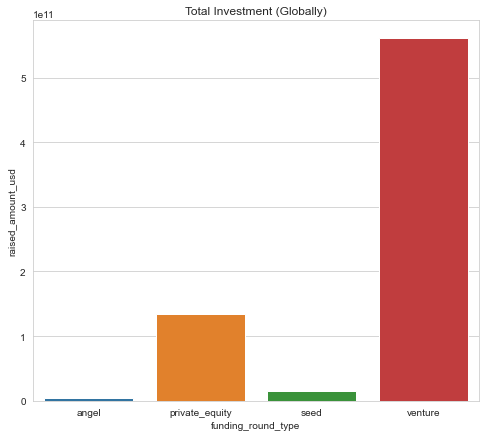

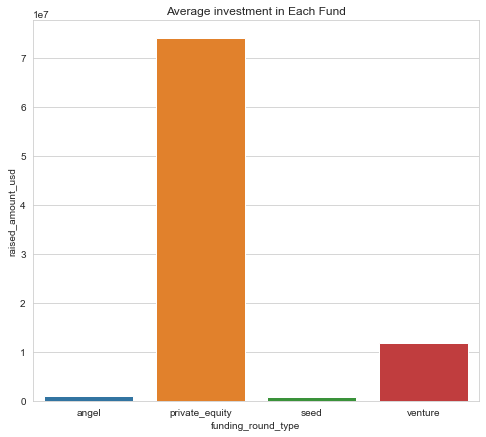

In [40]:
plt.figure(figsize=(8,7))
plt.title("Total Investment (Globally)")
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=tot_fund)
plt.show()


plt.figure(figsize=(8,7))
plt.title("Average investment in Each Fund")
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=avg_fund)
plt.show()

In [41]:
country_FT = master_copy.groupby('country_code', as_index=False)['raised_amount_usd'].sum().sort_values('raised_amount_usd',ascending=False)
print(country_FT.head())
top9_ct = country_FT[0:9]
print(top9_ct)

    country_code  raised_amount_usd
124          USA       5.084739e+11
21           CHN       6.100092e+10
40           GBR       2.689981e+10
53           IND       2.104911e+10
18           CAN       1.316891e+10
    country_code  raised_amount_usd
124          USA       5.084739e+11
21           CHN       6.100092e+10
40           GBR       2.689981e+10
53           IND       2.104911e+10
18           CAN       1.316891e+10
29           DEU       8.580103e+09
57           ISR       8.101823e+09
39           FRA       8.078614e+09
88           NLD       5.058484e+09


In [42]:
country_FT = master_copy.groupby('country_code', as_index=False)['raised_amount_usd'].sum().sort_values('raised_amount_usd',ascending=False)
print(country_FT.head())
top9_ct = country_FT[0:9]
print(top9_ct)

    country_code  raised_amount_usd
124          USA       5.084739e+11
21           CHN       6.100092e+10
40           GBR       2.689981e+10
53           IND       2.104911e+10
18           CAN       1.316891e+10
    country_code  raised_amount_usd
124          USA       5.084739e+11
21           CHN       6.100092e+10
40           GBR       2.689981e+10
53           IND       2.104911e+10
18           CAN       1.316891e+10
29           DEU       8.580103e+09
57           ISR       8.101823e+09
39           FRA       8.078614e+09
88           NLD       5.058484e+09
